# Capstone Project: Customer Churn Prediction

#This project aims to develop a predictive model that can estimate the Customer churn in the telecom industry. By analyzing historical customer data sourced from Kaggle, we'll identify key factors influencing customer behavior and build a robust model to forecast future value. This will enable the telecom company to make data-driven decisions, such as targeted marketing campaigns and personalized customer experiences, to maximize long-term profitability.

In [112]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score

Loading the Data using pandas.

In [114]:
#reading the file
mobile = pd.read_csv('t-mobile datasset.csv')
mobile

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [115]:
mobile.head()
#displaying first 5 rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [116]:
mobile.shape
#displaying number of (rows, columns)

(7043, 21)

In [117]:
mobile.size #displaying the dataframe size

147903

In [118]:
mobile.info() #displaying valuable information of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [119]:
mobile.describe() #displaying statistical properties of dataframe

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [120]:
mobile.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [121]:
mobile.isnull().sum() #checking for null values
     

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

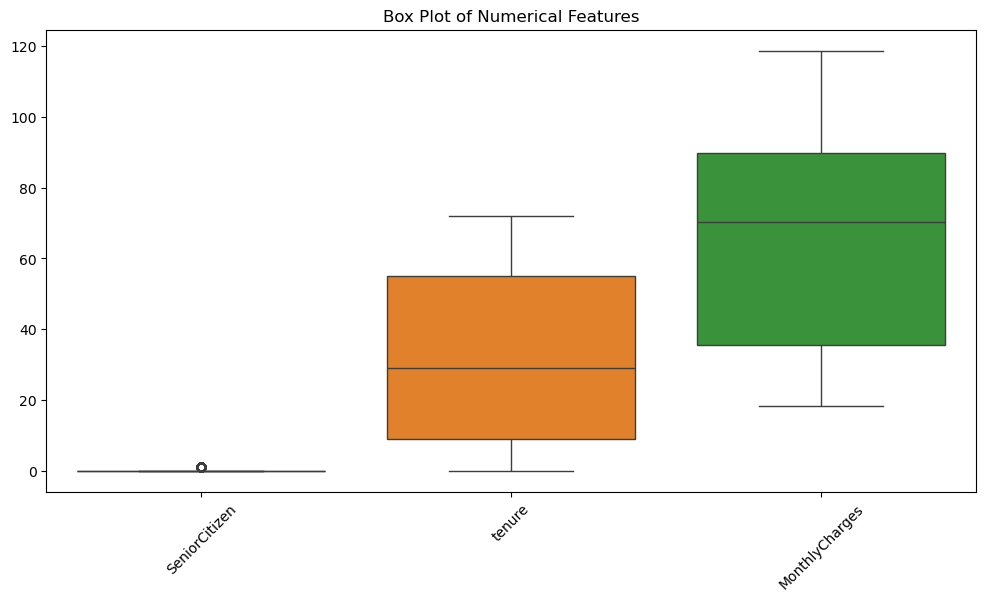

In [122]:
#checking for outliers
#Visualizing outliers using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=mobile)
plt.title("Box Plot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

In [123]:
#Analyzing the distribution of numerical features
numerical_features = ['tenure', 'MonthlyCharges']

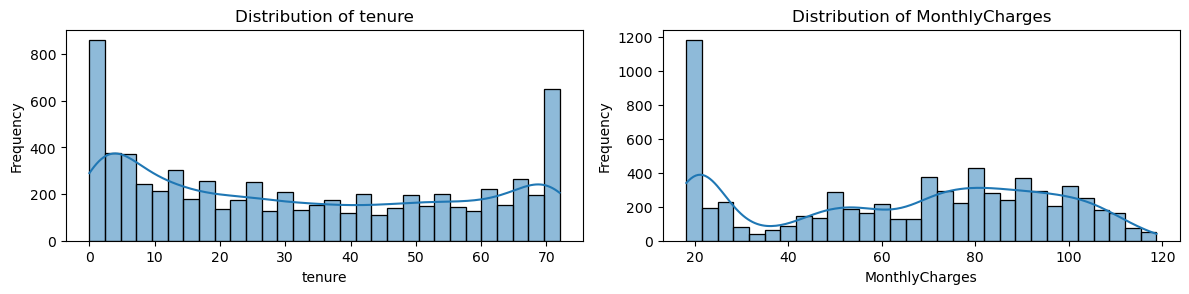

In [124]:
#Creating histograms for each numerical feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1)  # Adjusting to a 3x2 grid for better layout
    sns.histplot(mobile[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [125]:
#Dropping columns that is not needed in the model
mobile = mobile.drop(columns=['gender', 'customerID', 'Partner'])
     

In [126]:
#Converting categorical variables into dummy variables (one-hot encoding)
mobile = pd.get_dummies(mobile, drop_first=True)

In [127]:
numeric_columns = mobile.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()

In [128]:
numeric_columns = numeric_columns.dropna()
correlation_matrix = numeric_columns.corr()

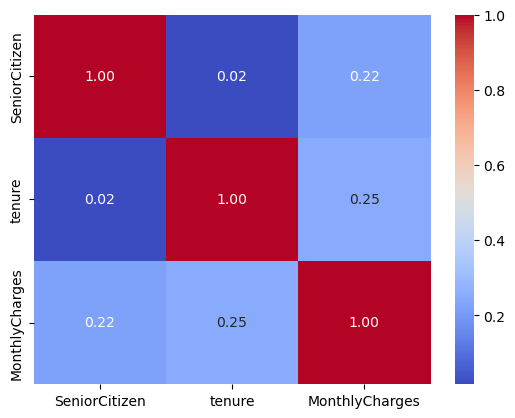

In [129]:
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

#Feature Engineering

In [131]:
#Investigating correlation with churn (Tenure)
churn_correlation = correlation_matrix['tenure'].sort_values(ascending=False)
print("Correlation with tenure (Churn):")
print(churn_correlation)

Correlation with tenure (Churn):
tenure            1.000000
MonthlyCharges    0.247900
SeniorCitizen     0.016567
Name: tenure, dtype: float64


In [132]:
#Creating feature
mobile['SeniorCitizen_MonthlyCharges'] = mobile['SeniorCitizen'] * mobile['MonthlyCharges']
#Creating a feature to measure customer tenure (which could reflect how long they've been loyal)
mobile['LoyaltyValue'] = mobile['tenure'] * mobile['MonthlyCharges']
print(mobile)

      SeniorCitizen  tenure  MonthlyCharges  Dependents_Yes  PhoneService_Yes  \
0                 0       1           29.85           False             False   
1                 0      34           56.95           False              True   
2                 0       2           53.85           False              True   
3                 0      45           42.30           False             False   
4                 0       2           70.70           False              True   
...             ...     ...             ...             ...               ...   
7038              0      24           84.80            True              True   
7039              0      72          103.20            True              True   
7040              0      11           29.60            True             False   
7041              1       4           74.40           False              True   
7042              0      66          105.65           False              True   

      MultipleLines_No phon

In [172]:
numeric_columns

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


In [206]:
#Assigning columns to features and target
X = numeric_columns.drop(columns=['tenure'])
y = numeric_columns['tenure']

In [188]:
#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Training

In [190]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
model = RandomForestRegressor(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 835.6004347040903
R2 Score: 0.07706664908524774


In [192]:
#Hyperparameter Tuning using Randomized Search CV

In [194]:
#Defining the parameter distribution (ranges) instead of grid
param_dist = {
    'n_estimators': np.arange(100, 1001, 100),  # Random sample n_estimators from 100 to 1000
    'max_depth': [10, 20, 30, None],             # Random sample max_depth values
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [196]:
print(param_dist)

{'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000]), 'max_depth': [10, 20, 30, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['sqrt', 'log2']}


In [198]:
#Initializing RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

In [200]:
rf

RandomForestClassifier(random_state=42)

In [202]:
#Setting up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=50, cv=3, n_jobs=-1, verbose=2, random_state=42)

In [212]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Initialize the regression model
model = RandomForestRegressor(random_state=42)

# Define parameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter settings sampled
    scoring='neg_mean_squared_error',  # Regression metric
    cv=5,  # Cross-validation folds
    random_state=42,
    verbose=2,
    n_jobs=-1
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best Hyperparameters:", random_search.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}


Retrain model with best hyperparameter

After finding the best hyperparameter, retraining the model using those parameter

In [220]:
#Getting the best model from RandomizedSearchCV
best_rf_model = random_search.best_estimator_

In [222]:
#Retraining the model on the training data
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, random_state=42)

In [224]:
#Predicting on the test set
y_pred = best_rf_model.predict(X_test)

In [226]:
y_pred

array([48.51317457, 67.3650753 , 64.15046699, ..., 60.68512729,
       68.05088744, 48.51317457])

#Model Evalution

Evaluating the performance of the model using metrics like accuracy, precision, recall, F1-score, and AUC

In [236]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")

# R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")


Mean Squared Error: 831.7260
Mean Absolute Error: 24.5752
R-squared: 0.0813
